In [1]:
import jaxpv
from jax import numpy as np, grad, jacfwd, ops
import matplotlib.pyplot as plt

ImportError: cannot import name 'iv' from 'jaxpv' (/Users/seanmann/Dropbox (MIT)/MIT/RomanoLab/jaxpv_project/jaxpv/jaxpv/__init__.py)

In [2]:
N = 500
grid = np.linspace(0, 3e-4, N)
cell = jaxpv.simulator.create_cell(grid)
material = jaxpv.materials.load_material("Si")
material = jaxpv.materials.update(material, A=1e4)
cell = jaxpv.simulator.add_material(cell, material, lambda _: True)
cell = jaxpv.simulator.contacts(cell, 1e7, 0, 0, 1e7)
cell = jaxpv.simulator.single_pn_junction(cell, 1e17, -1e15, 5e-6)
phi = 1e17  # photon flux [cm-2 s-1]
alpha = 2.3e4  # absorption coefficient [cm-1]
G = phi * alpha * np.exp(-alpha * grid)  # cm-3 s-1
cell = jaxpv.simulator.custom_generation(cell, G)

F(cell, pot(cell)) = 0

dF/dcell = F_cell + F_pot @ pot_cell = 0

pot_cell = -inv(F_pot) @ F_cell

dphi_dEg = -inv(F_pot.phi) @ F_cell.Eg

In [3]:
def g(pot):
    return np.sum(pot.phi)

def f(cell):
    pot_sol = jaxpv.simulator.solve_equilibrium(cell)
    return g(pot_sol)

gradf = grad(f)
gradg = grad(g)

In [4]:
sol = jaxpv.simulator.solve_equilibrium(cell)
obj = f(cell)
dobj = gradf(cell)

Solving equilibrium...
Solving equilibrium...
Solving equilibrium...


In [5]:
dFeq = jacfwd(jaxpv.residual.F_eq, argnums=[0, 1])
Fcell, Fpot = dFeq(cell, sol)

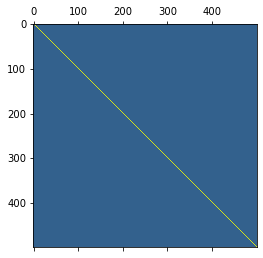

In [6]:
plt.matshow(Fpot.phi)

In [59]:
sparse = jaxpv.residual.F_eq_deriv(cell, sol)

def sparse2dense(m):
    
    n = m.shape[0]
    dense = np.stack([np.pad(m[i], (i, n - 1 - i)) for i in range(n)])[:, 6:-6]
    
    return dense

Fpotphi = sparse2dense(sparse)

In [67]:
np.argwhere(np.logical_not(np.isclose(Fpot.phi, Fpotphi)))

DeviceArray([[  0,   0],
             [499, 499]], dtype=int64)

In [69]:
Fpot.phi[0, 0], Fpotphi[0, 0]

(DeviceArray(0., dtype=float64), DeviceArray(1., dtype=float64))

In [70]:
Fpot.phi[499, 499], Fpotphi[499, 499]

(DeviceArray(0., dtype=float64), DeviceArray(1., dtype=float64))